# Model

In [4]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:

%matplotlib inline

In [5]:
df = pd.read_csv('Data_2000_2016.csv')
df_1 = df[df['PrevClinName1']=="COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODUCTIVE CARE"]
df_2 = df[df['PrevClinName1']=="CLEVELAND CLINIC FERTILITY CENTER"]

In [7]:
x = df_1['Year']#.values.reshape(-1,1)
y = df_1['FshNDLvBirthsRate1']#.values#.reshape(-1,1)

In [10]:
with pm.Model() as linear_model_500:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * x
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace_500 = pm.sample(1000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 4 chains, 3 divergences: 100%|██████████| 6000/6000 [00:12<00:00, 469.79draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8846579096523237, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


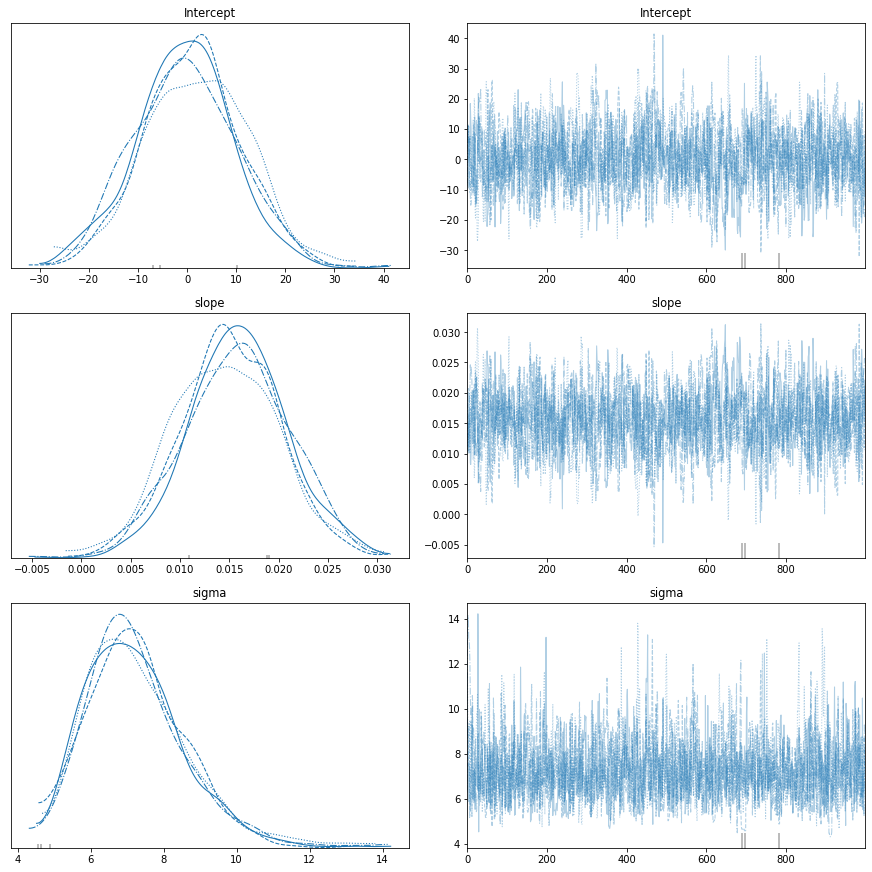

In [12]:
pm.traceplot(linear_trace_500, figsize = (12, 12));

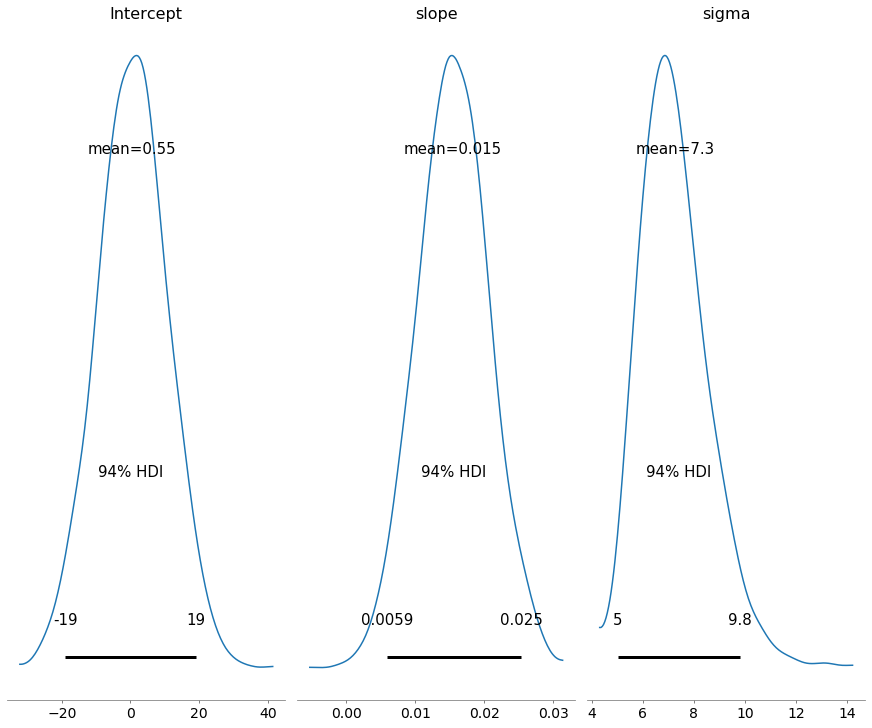

In [14]:
pm.plot_posterior(linear_trace_500, figsize = (12, 10));

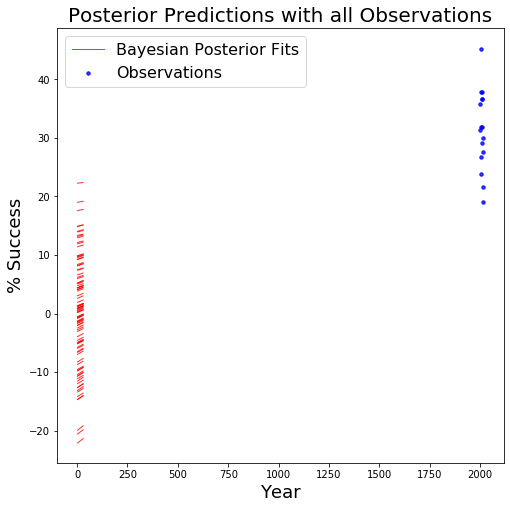

In [18]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace_500, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(x, y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
#plt.plot(x, by_hand_coefs[0] + x * by_hand_coefs[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Year', size = 18);
plt.ylabel('% Success', size = 18);
plt.legend(prop={'size': 16});

In [ ]:
#import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X, family = family)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500, njobs=-1)